# 

In [1]:
import librosa
import audio_io

audio_dict = audio_io.load_list(["thunder.wav", "kicks.wav"])
thunder_raw = audio_dict["thunder.wav"][0]
kicks_raw = audio_dict["kicks.wav"][0]



done!
done!


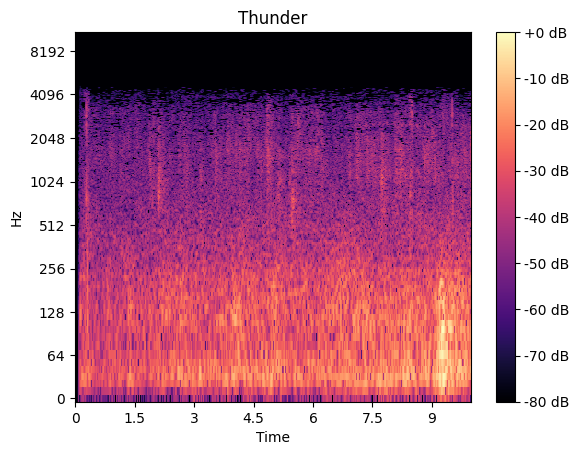

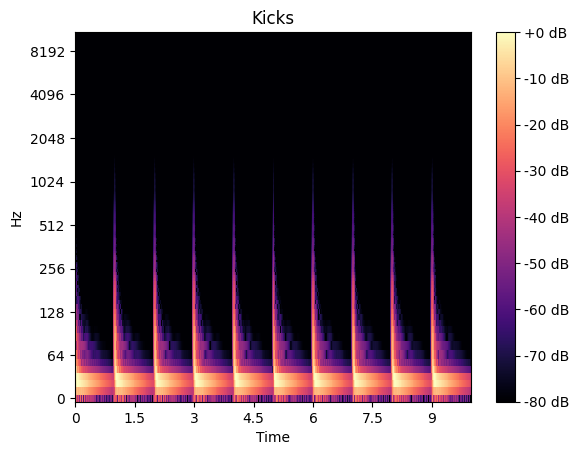

In [2]:
import plotting
import librosa
import processing
import numpy as np

trims = processing.squash_and_trim([thunder_raw, kicks_raw], 220500)
thunder_spectogram, _ = processing.calc_spectogram(trims[0])
plotting.plot_spectogram(thunder_spectogram, "Thunder")


kicks_spectogram, _ = processing.calc_spectogram(trims[1])
plotting.plot_spectogram(kicks_spectogram, "Kicks")


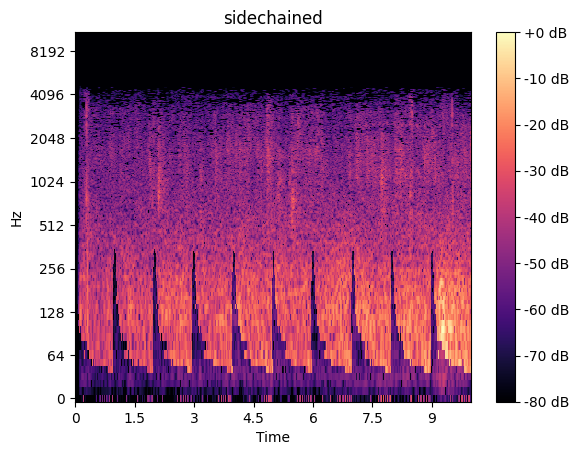

In [3]:
thunder_kick_sc = processing.compress_spect_slice(-50, 2, kicks_spectogram, thunder_spectogram)

plotting.plot_spectogram(thunder_kick_sc, "sidechained")

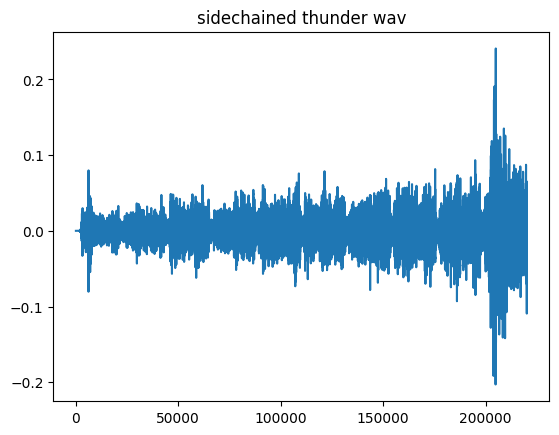

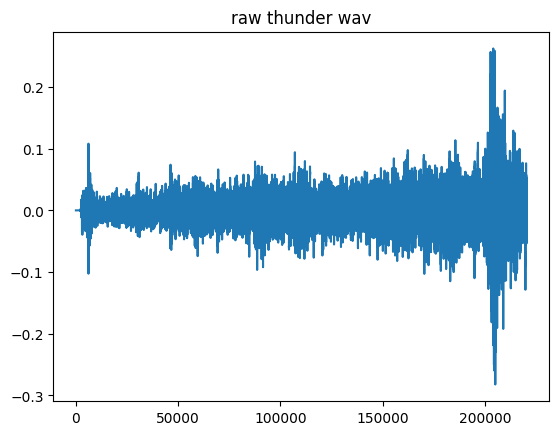

[ 0.00000000e+00 -1.24630565e-13 -4.99007898e-13 ... -1.00439429e-01
 -7.49607031e-02 -4.21702655e-02]


In [4]:
import matplotlib.pyplot as plt

result_audio = processing.griffinlim_spec_to_audio(thunder_kick_sc)

plt.figure(1)
plt.title("sidechained thunder wav")
plt.plot(result_audio)
plt.show()
plt.figure(2)
plt.title("raw thunder wav")
plt.plot(trims[0])
plt.show()

print(result_audio)
import soundfile as sf

sf.write("result.wav", result_audio, 44100)